<a href="https://colab.research.google.com/github/ananditabodas/Personality_Type/blob/main/Personality_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **EXPLORATORY DATA ANALYSIS OF THE BIG 5 PERSONALITY TEST QUESTIONNAIRE**

About the Big 5 Personality Test:

The Big 5 Test aims to categorize the level of 5 major dimensions of personality, represented by the acronym OCEAN. They are:
- Openness
- Conscientiousness
- Extraversion
- Agreeableness
- Neuroticism

About the test:

The test consists of 50 statements that must be rated on a scale of 1 to 5. This dataset is available here: https://openpsychometrics.org/tests/IPIP-BFFM/


#**Imports and Data Preprocessing**

In [ ]:
import pandas as pd
import numpy as np
import altair as alt
import re
import matplotlib.pyplot as plt
import seaborn as sns
import random
import matplotlib.colors as mcolors

In [ ]:
df= pd.read_csv('data.csv', sep='\t')
df.columns

Index(['race', 'age', 'engnat', 'gender', 'hand', 'source', 'country', 'E1',
       'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'N1', 'N2', 'N3',
       'N4', 'N5', 'N6', 'N7', 'N8', 'N9', 'N10', 'A1', 'A2', 'A3', 'A4', 'A5',
       'A6', 'A7', 'A8', 'A9', 'A10', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7',
       'C8', 'C9', 'C10', 'O1', 'O2', 'O3', 'O4', 'O5', 'O6', 'O7', 'O8', 'O9',
       'O10'],
      dtype='object')

In [ ]:
with open ('codebook.txt') as f:
    lines= f.readlines()

In [ ]:
pattern = r'([A-Z]\d+)\s+(.+)'
pattern2 = r'(([a-z])+)\t((.)+)'

questions_dict={}

In [ ]:
for line in lines:
    matches = re.findall(pattern, line)
    for match in matches:
        question_number = match[0]
        question_text = match[1]
        questions_dict[question_number] = question_text
    matches2 = re.search(pattern2, line)
    if matches2:
        question_number= matches2.group(1)
        question_text= matches2.group(3)
        questions_dict[question_number] = question_text


In [ ]:
questions_dict

{'E1': 'I am the life of the party.',
 'E2': "I don't talk a lot.",
 'E3': 'I feel comfortable around people.',
 'E4': 'I keep in the background.',
 'E5': 'I start conversations.',
 'E6': 'I have little to say.',
 'E7': 'I talk to a lot of different people at parties.',
 'E8': "I don't like to draw attention to myself.",
 'E9': "I don't mind being the center of attention.",
 'E10': 'I am quiet around strangers.',
 'N1': 'I get stressed out easily.',
 'N2': 'I am relaxed most of the time.',
 'N3': 'I worry about things.',
 'N4': 'I seldom feel blue.',
 'N5': 'I am easily disturbed.',
 'N6': 'I get upset easily.',
 'N7': 'I change my mood a lot.',
 'N8': 'I have frequent mood swings.',
 'N9': 'I get irritated easily.',
 'N10': 'I often feel blue.',
 'A1': 'I feel little concern for others.',
 'A2': 'I am interested in people.',
 'A3': 'I insult people.',
 'A4': "I sympathize with others' feelings.",
 'A5': "I am not interested in other people's problems.",
 'A6': 'I have a soft heart.',


In [ ]:
o_columns = [col for col in df.columns if (col.startswith('O') and len(col)==2)]
df['Openness'] = df[o_columns].sum(axis=1)

e_columns = [col for col in df.columns if (col.startswith('E') and len(col)==2)]
df['Extraversion'] = df[e_columns].sum(axis=1)

n_columns = [col for col in df.columns if (col.startswith('N') and len(col)==2)]
df['Neuroticism'] = df[n_columns].sum(axis=1)

a_columns = [col for col in df.columns if (col.startswith('A') and len(col)==2)]
df['Agreeableness'] = df[a_columns].sum(axis=1)

c_columns = [col for col in df.columns if (col.startswith('C') and len(col)==2)]
df['Conscientiousness'] = df[c_columns].sum(axis=1)

In [ ]:
rows_with_zero = df[(df == 0).any(axis=1)].index
alldata= df[~df.index.isin(rows_with_zero)]


# **Exploratory Data Analysis**

# By Country

The first thing I would like to analyze if there are some trends in personality by country. For this purpose, let us analyze data from the following countries:

1. USA (US)
2. India (IN)
3. Australia (AU)
4. Philippines (PH)
5. Italy (IT)
6. South Africa (ZA)
7. Brazil (BR)
8. Denmark (DE)
9. Singapore (SG)
10. UAE (AE)
11. Pakistan (PK)
12. France (FR)

---








In [ ]:
country_filter= ["US", "IN", "AU", "PH", "IT", "ZA", "BR", "DE", "SG", "AE", "PK", "FR"]


In [ ]:
traits= ['Extraversion', 'Agreeableness', 'Neuroticism','Openness', 'Conscientiousness']

In [ ]:
traitsbycountry= alldata[(alldata['country'].isin(country_filter)) ]
traitsbycountry= traitsbycountry[['country' ]+ traits]

In [ ]:
color_list= list(mcolors.BASE_COLORS.keys())[:len(traits)]


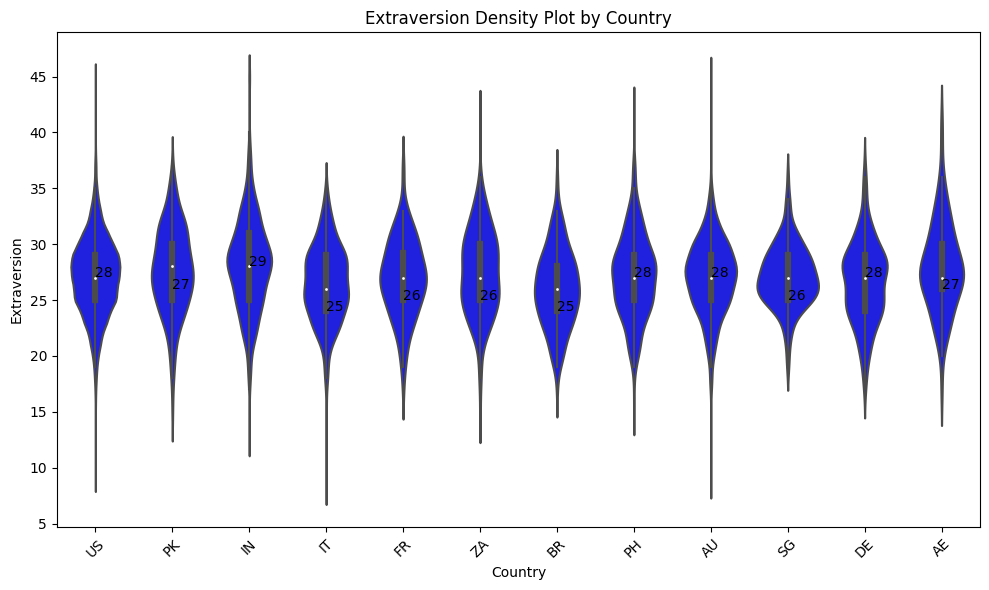

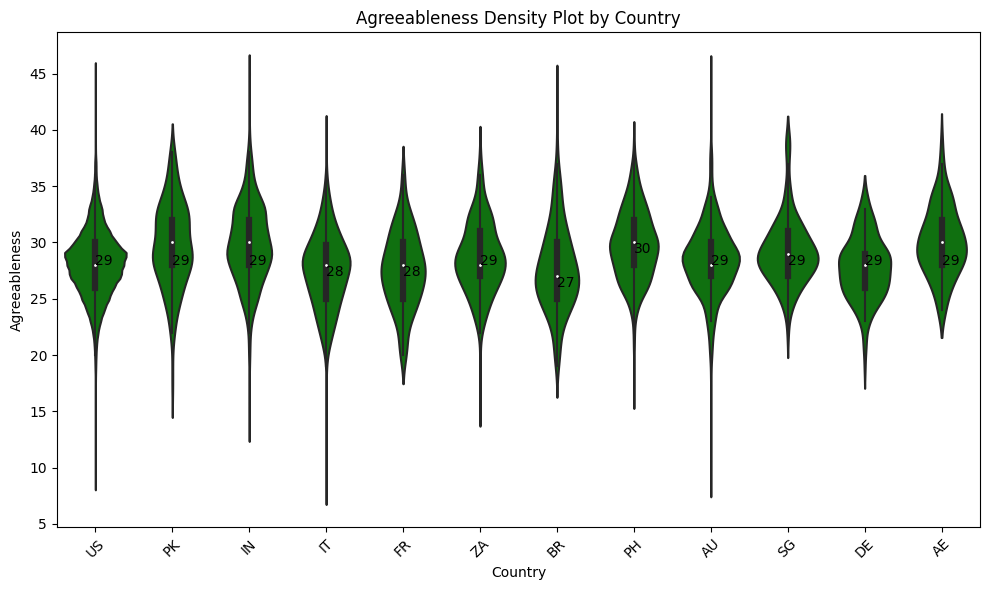

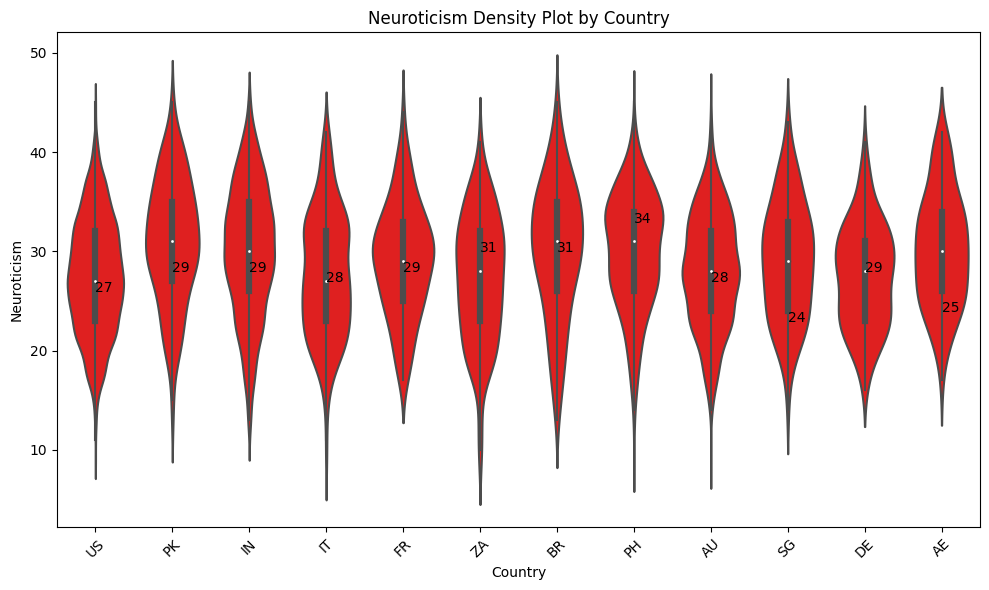

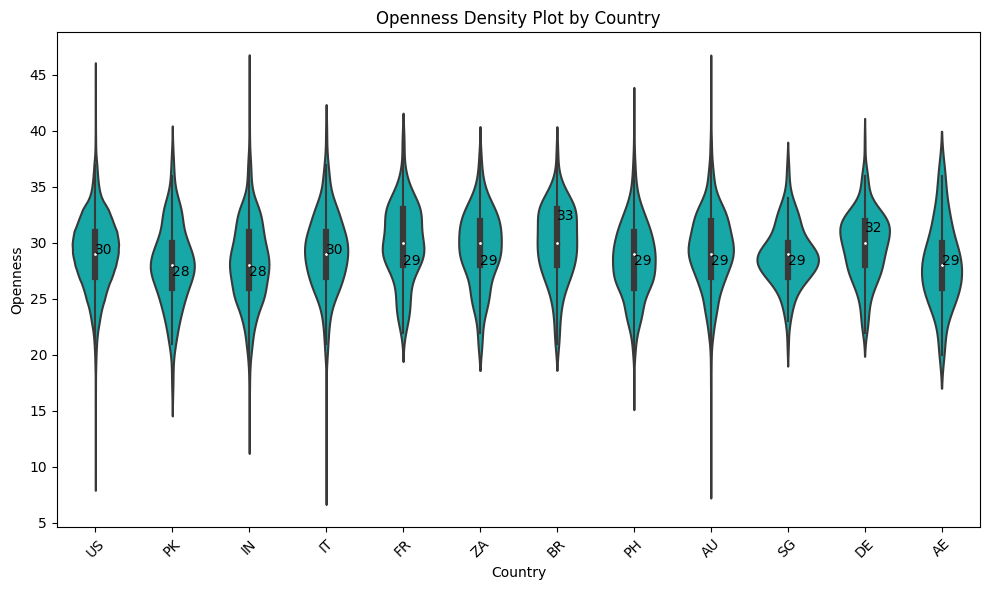

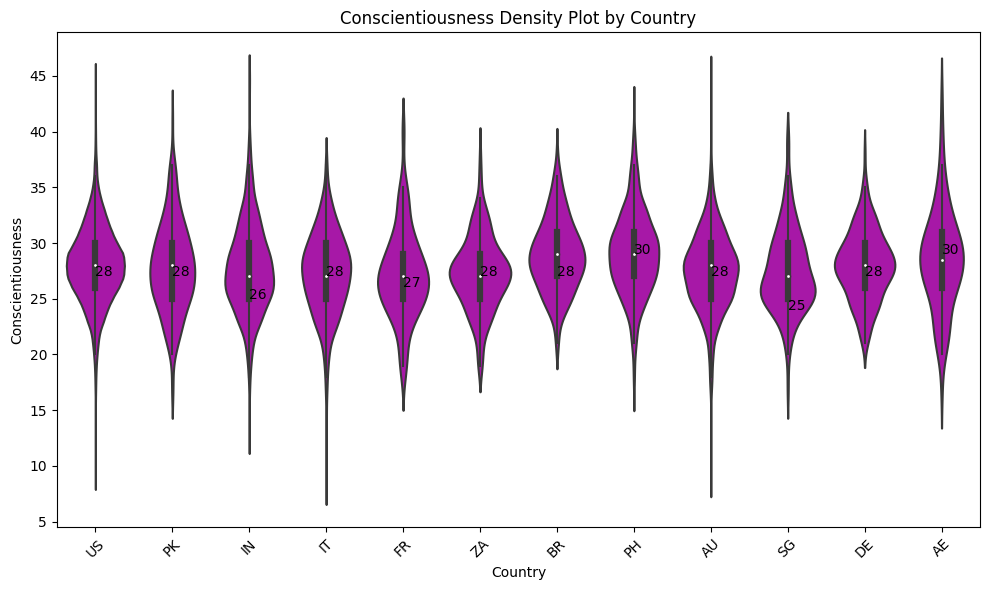

In [ ]:
for i,trait in enumerate(traits):

    #grouped_trait= traitsbycountry.groupby(['country'])[trait].sum().reset_index()
    #print (grouped_trait.head())
    plt.figure(figsize=(10, 6))
    ax= sns.violinplot(data=traitsbycountry, x='country',common_norm=False, y=trait,color= color_list[i], cmap=color_list[i])
    medians = traitsbycountry.groupby('country')[trait].apply(lambda x: x.mode().iat[0])
    medians = medians.astype(int)
    for i, country in enumerate(traitsbycountry['country'].unique()):
        #ax.plot(i, medians[country], marker='o', color='black', markersize=8)
        ax.text(i, medians[country] , f'{medians[country]}', ha='left', va='top', fontsize=10)
    # Customize the plot
    plt.title(trait+' Density Plot by Country')
    plt.xlabel('Country')
    plt.ylabel(trait)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()




*The number inside each violin plot represents the Mode, ie, the most frequently occurring score for that country.*

🤔 **Observations:**

1. Australia seems to be most individualistic, ie, there's most range in personality in Australia. The violin plots across all traits have very long tails, implying a large number of outliers.
2. Singapore's and Denmark's violin plots across all traits are fatter and smaller, implying least individuality in character traits amongst people of those countries.
3. The largest range across countries was exhibited by the Neuroticism trait. Phillipines and UAE are on either ends of the spectrum with respect to the mode.
4. The Agreeableness trait almost doesn't vary between countries.

**Caveats:**

1. Greater the data we have for a particular country, greater the possibility of range in traits. I have tried to offset this issue by only considering the top 25 countries by quantity of collected data.
2. A higher score doesn't imply a high characteristic trait. Statements such as 'I keep in the background' belonging to the Extraversion set will rank very high for less extraverted people, ie, they're inversely correlated. Therefore, neither the plot nor the mode indicated in the plots above is to be taken as a measure of the level of that trait for a country.








---


Now, let us look at individual traits and whether they vary by culture (in our case, the proxy for culture is the country)





In [ ]:
traitsbycountry= alldata[(alldata['country'].isin(country_filter)) ]

In [ ]:
traits= ['A8', 'A4', 'C10', 'E5']
color_list= list(mcolors.BASE_COLORS.keys())[:len(traits)]

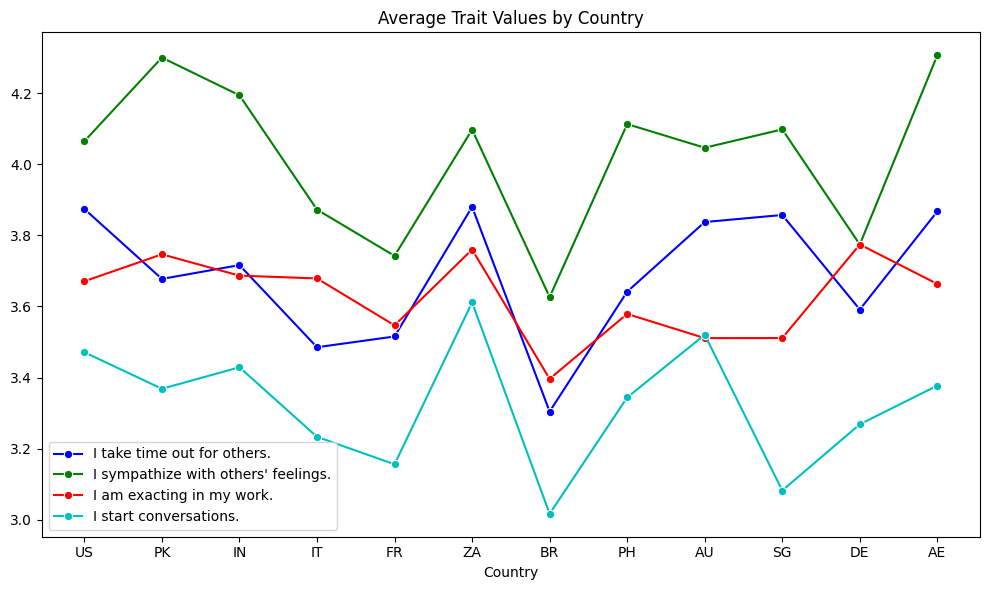

In [ ]:
plt.figure(figsize=(10, 6))

for i,trait in enumerate(traits):
    sns.lineplot(data=traitsbycountry, x='country', y=trait, label=questions_dict[trait], color= color_list[i], marker='o',errorbar=None)
plt.title("Average Trait Values by Country")
plt.xlabel("Country")
plt.ylabel("")
plt.legend()
plt.tight_layout()
plt.show()


We've picked 4 traits to assess the sense of community and self by country:

- A4- I sympathize with others' feelings.
- A8- I take time out for others.
- C10- I am exacting in my work.
- E5- I start conversations.


🤔 **Observations:**

1. Ironically, sympathizing with others doesn't necessarily equate to taking time out for them. Pakistan and India are prime examples of this. They rank highly on average sympathy but significantly lower on taking time out for others.
2. People from Brazil, Singapore and France seem to rarely initiate conversations, whilst people from South Africa lie on the other end of this spectrum.
3. South Africa is amongst the top 3 in all the traits, implying a strong sense of community. We have Brazil on the opposite end of this spectrum, consistently amongst the bottom 2 for all the traits.
4. People from Denmark seem to have a tendency for perfectionism (a high C10 average)





---


# By Age

Next, I'd like to see if certain traits change with age.

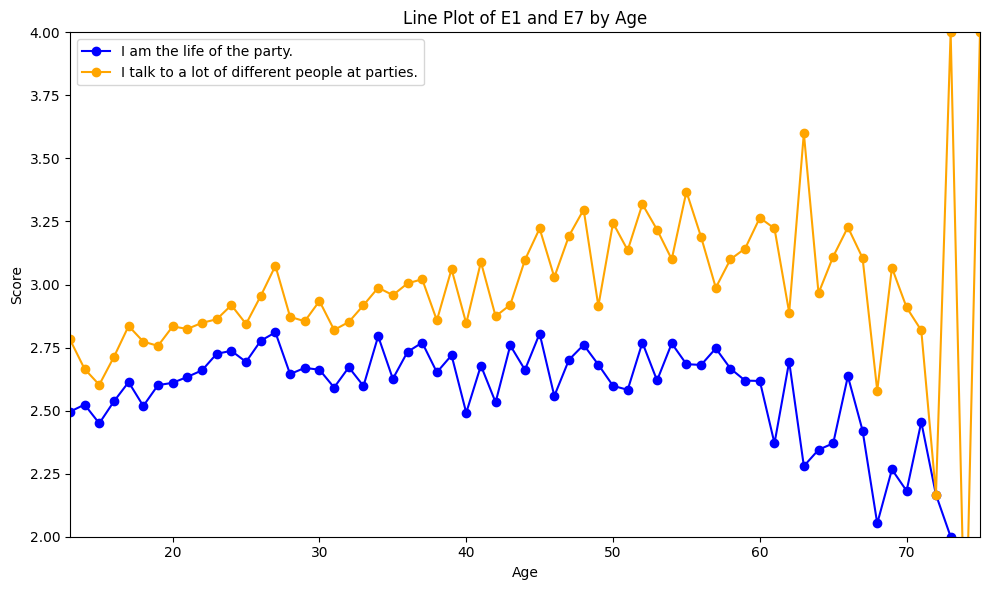

In [ ]:
age_extraversion1= alldata.groupby(['age'])['E1'].mean().reset_index()
age_extraversion2= alldata.groupby(['age'])['E7'].mean().reset_index()


plt.figure(figsize=(10, 6))
plt.plot(age_extraversion1['age'], age_extraversion1['E1'] ,label=questions_dict['E1'], color='blue', marker='o')
plt.plot(age_extraversion2['age'], age_extraversion2['E7'],label=questions_dict['E7'], color='orange', marker='o')
plt.xlim(13, 75)
plt.ylim(2.0, 4.0)

plt.title("Line Plot of E1 and E7 by Age")
plt.xlabel("Age")
plt.ylabel("Score")
plt.legend()
plt.tight_layout()
plt.show()


We are comparing two similar Extraversion traits:
- 'E1': 'I am the life of the party.'
- 'E7': 'I talk to a lot of different people at parties.'

🤔 **Observations:**

- As expected, the two extraversion traits move almost in tandem with one another.
- However, what was suprising was the unexpected steady increase of both the traits until around age 55, after which it stagnates before declining.



---


We are now comparing two opposing characteristics:

- 'N1': 'I get stressed out easily.'
- 'N2': 'I am relaxed most of the time.'

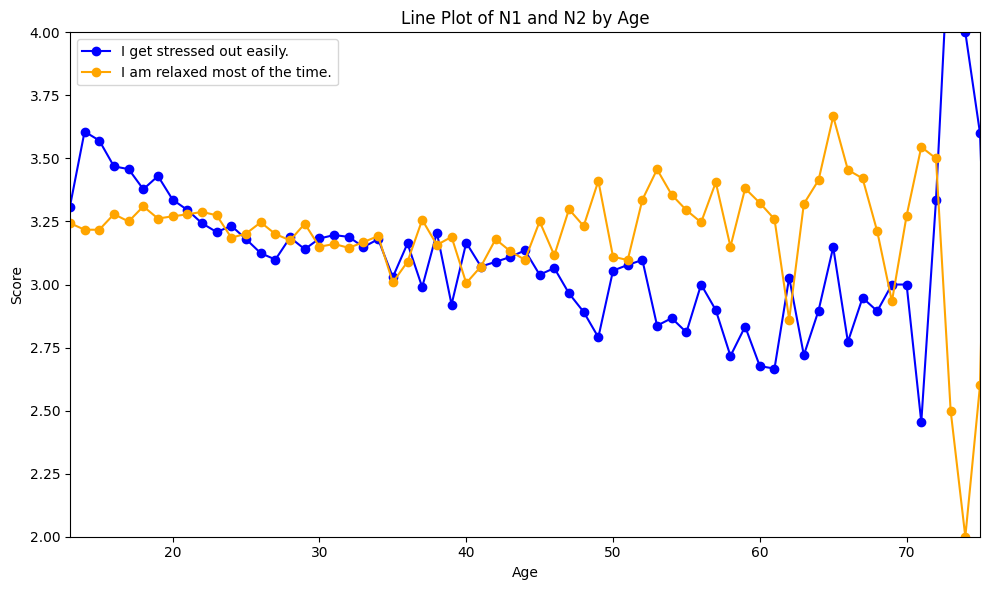

In [ ]:
age_neuro1= alldata.groupby(['age'])['N1'].mean().reset_index()
age_neuro2= alldata.groupby(['age'])['N2'].mean().reset_index()


plt.figure(figsize=(10, 6))
plt.plot(age_neuro1['age'], age_neuro1['N1'] ,label=questions_dict['N1'], color='blue', marker='o')
plt.plot(age_neuro2['age'], age_neuro2['N2'],label=questions_dict['N2'], color='orange', marker='o')
plt.xlim(13, 75)
plt.ylim(2.0, 4.0)
plt.title("Line Plot of N1 and N2 by Age")
plt.xlabel("Age")
plt.ylabel("Score")
plt.legend()
plt.tight_layout()
plt.show()



🤔 **Observations:**

- After age 40, there is a significant diversion in the two traits. N2 (relaxed trait) increases while N1 (stress trait) decreases until age 70, where the trend reverses once again.



---


It is often said that our ability to adjust and adapt reduces with age. I want to see what the dataset says about this. As a proxy, let us look at the effect age has on the following traits:

- C1- I am always prepared
- C7- I like order
- C9- I follow a schedule.

In [ ]:
traits= ['C1', 'C7', 'C9']
color_list= list(mcolors.BASE_COLORS.keys())[:len(traits)]

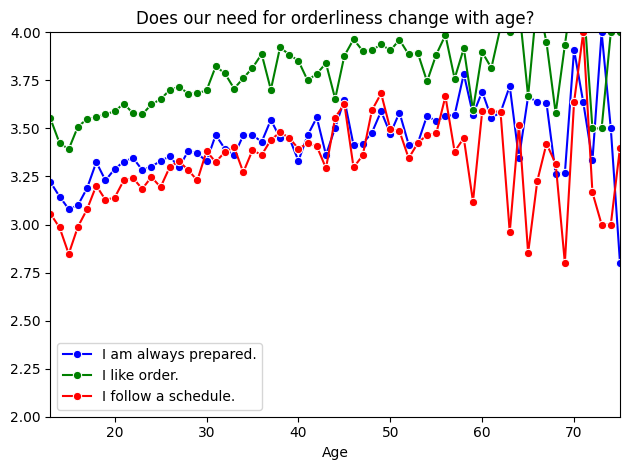

In [ ]:
for i,trait in enumerate(traits):
    sns.lineplot(data=alldata, x='age', y=trait, label=questions_dict[trait], color= color_list[i], marker='o',errorbar=None)
plt.title("Does our need for orderliness change with age?")
plt.xlim(13, 75)
plt.ylim(2.0, 4.0)
plt.xlabel("Age")
plt.ylabel("")
plt.legend()
plt.tight_layout()
plt.show()

🤔 **Observations:**

- The need for orderliness steadily increases from our teenage years up to age 45-50.
- Around age 55, the ability to follow a schedule declines over time. This aligns with the average retirement age in the world. There is a possibility that the requirement to follow a schedule doesn't remain as important once one retires.



---


I want to now see if our imagination skills change with age.

Let us consider the following traits:
- O3- I have a vivid imagination.
- O4- I am not interested in abstract ideas.
- O10- I am full of ideas.

*(Note: To maintain uniformity and ease of understanding, I will be flipping 04 by adding a negative sign against it. This means, that we will actually be checking for the trait 'I am interested in ideas'.)*

In [ ]:
traits= ['O3', 'O4', 'O10']
color_list= list(mcolors.BASE_COLORS.keys())[:len(traits)]

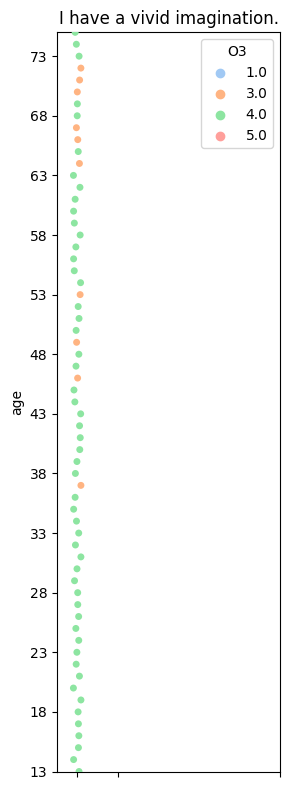

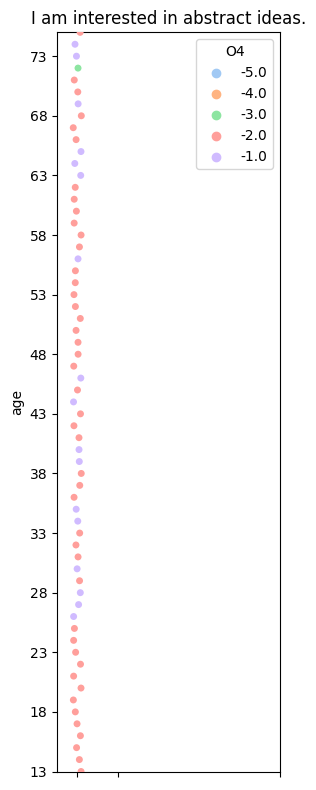

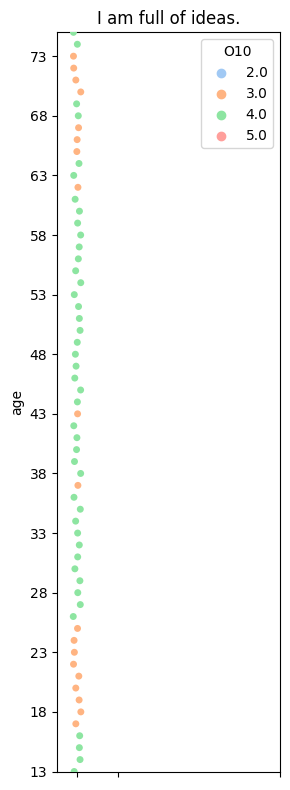

In [ ]:

for i,trait in enumerate(traits):

    title= questions_dict[trait]
    title= re.sub(' not', '', title)

    alldata2= alldata.groupby(['age'])[trait].mean().reset_index()
    alldata2[trait]= np.floor(alldata2[trait])
    if trait=='O4':
        alldata2[trait]= -1 * alldata2[trait]
    plt.figure(figsize=(3, 8))

    a= sns.stripplot(data=alldata2, y= 'age', hue=trait, palette= "pastel")
    plt.title(title)
    a.set_xticks(np.arange(0, 6, step=1))
    a.set_yticks(np.arange(13, 80, step= 5))
    a.set_xticks([0, 5, 1])
    plt.ylim(13, 75)
    plt.tight_layout()
    plt.show()


🤔 **Observations:**

- Interest in abstract ideas doesn't change with age.
- Claims to having a vivid imagination certainly reduce with age.
- 'I am full of ideas' surprisingly declines between the ages of approximately 17 and 25, and then increases again till around 60. 17 to 25 also happens to be the time period when majority are students. Could this be a by-product of the education system? Does it not allow for students to think of interesting ideas?

# Correlations Between Traits

Let's see if N2 (which is a Neuroticism characteristics) and C1 (which is a Conscientiousness trait) are correlated to one another in any way.

- N2- I am relaxed most of the time.
- C1- I am always prepared.

In [ ]:
'''
Find the percentage of people with a C1 ranking out of all the people having the N2 ranking.
'''
corr_count= alldata.groupby(['N2', 'C1'])['E1'].count().reset_index()
arr=[]
for i, row in corr_count.iterrows():
    all_relaxed= len(alldata[alldata['N2']==row['N2']])
    arr.append((row['E1']/all_relaxed)*100)
corr_count['cnt']= arr

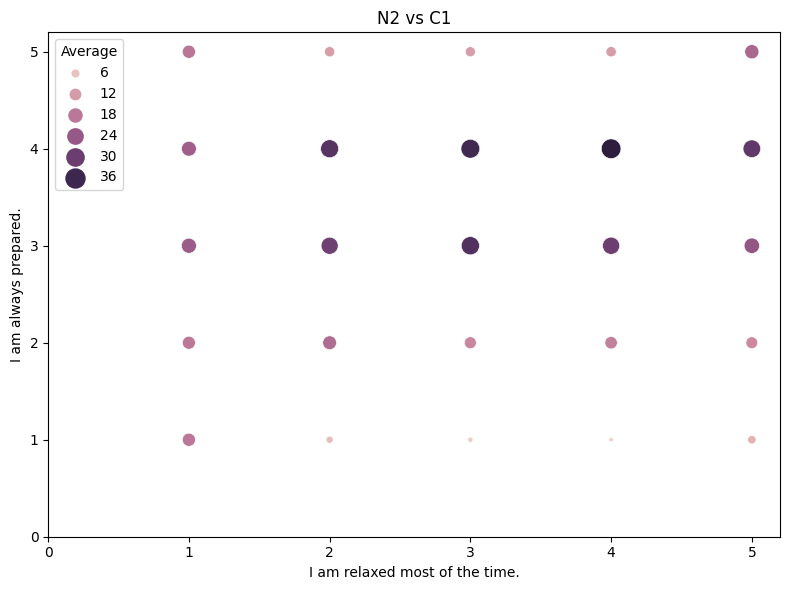

In [ ]:
plt.figure(figsize=(8, 6))
a= sns.scatterplot(data=corr_count, x='N2', y='C1', size='cnt', sizes=(10, 200), hue='cnt')
plt.title("N2 vs C1")
a.set_yticks(np.arange(0, 6, step= 1))
a.legend(title='Average')
a.set_xticks(np.arange(0, 6, step= 1))
plt.xlabel(questions_dict['N2'])
plt.ylabel(questions_dict['C1'])
plt.tight_layout()
plt.show()


🤔 **Observations:**
- Most people that are relaxed are also always prepared.
- However, the converse isn't true. Most people that are always prepared aren't necessarily relaxed.




---


Let us look at some similar traits now:
- A1- I feel little concern for others.
- A3- I insult people.
- A5- I am not interested in other people's problems.

In [ ]:
traits= ['A1', 'A3', 'A5']

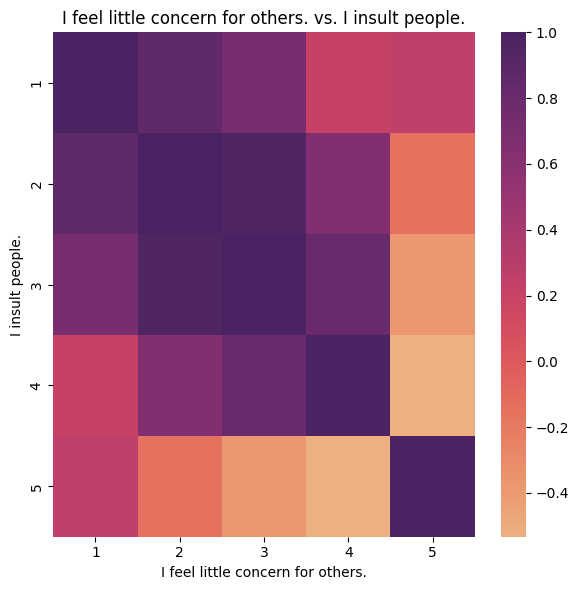

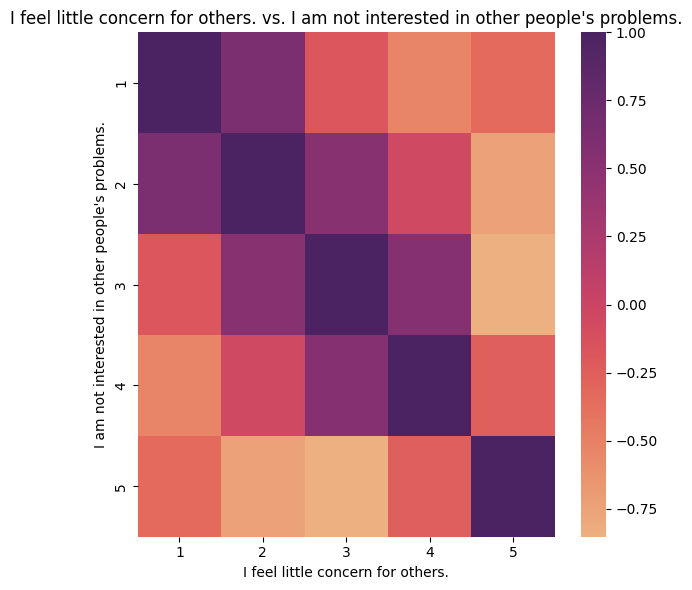

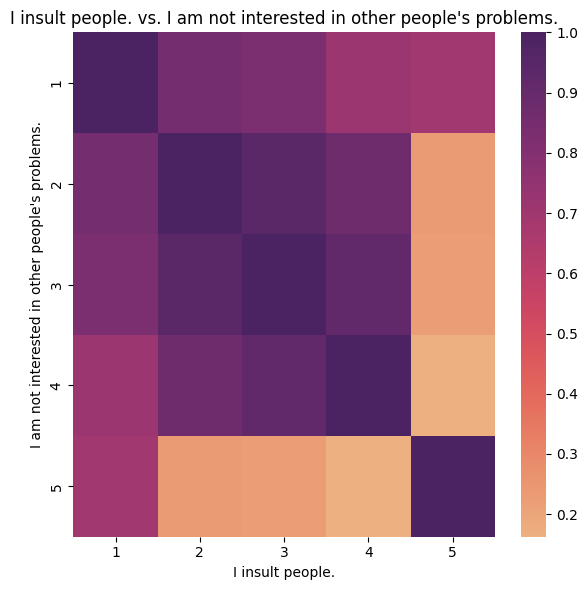

In [ ]:
for i, trait in enumerate(traits):
    for j, trait2 in enumerate(traits):
        if  (i<j):
            plt.figure(figsize=(6, 6))
            contingency_table = pd.crosstab(alldata[trait], alldata[trait2]).corr()#.reset_index()
            a= sns.heatmap(contingency_table, cmap='flare')
            plt.title(questions_dict[trait] + " vs. "+questions_dict[trait2])
            plt.xlabel(questions_dict[trait])
            plt.ylabel(questions_dict[trait2])
            plt.tight_layout()
            plt.show()




🤔 **Observations:**

- Insulting people is not related to feeling concern for people.
- Feeling little concern for others is directly related to not being interested in other people's problems.
- Being uninterested in other people's problems doesn't mean that they'd insult someone.